In [1]:
import pandas as pd
import sklearn as skl
from Functions.constants import *
from Functions.Common_functions import *
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_predict

dataset_df = formate_dataset()
dataset_df.head()
X_train, X_test, y_train_r, y_test_r = train_test_split(dataset_df[dataset_df.columns[0:16]], dataset_df['Energy'], test_size=0.20, random_state=42)
_, _, y_train_b, y_test_b = train_test_split(dataset_df[dataset_df.columns[0:16]], dataset_df['Energy efficiency'], test_size=0.20, random_state=42) 

In [2]:
dataset_df.head()

Relative compactness Surface area  Wall area Roof area Overall height  \
0              2.06355     -1.59779  -0.269786  -1.42786              1   
1               2.0694     -1.71823  -0.422547  -1.47112              1   
2              2.03073     -1.75999  -0.340612  -1.55169              1   
3              2.01447     -1.72899  -0.581134  -1.40454              1   
4              1.30869     -1.34281 -0.0477237  -1.28699              1   

  Glazing area GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North  \
0     -1.64028       1       0       0       0       0       0    0     1   
1     -1.83179       1       0       0       0       0       0    1     0   
2     -1.76649       1       0       0       0       0       0    0     0   
3     -1.76117       1       0       0       0       0       0    0     0   
4     -1.81079       1       0       0       0       0       0    0     1   

  South West   Energy Energy efficiency  
0     0    0  34.2639                 B  
1     0    0  34.5898                 B  
2     1    0   38.778                 C  
3     0    1  37.9478                 C  
4     0    0  47.6759                 D

In [3]:
X_test.shape

(154, 16)

In [4]:
X_train.shape

(614, 16)

## Regression lineaire ##

<p> Dans cette partie le modèle de prévision sera implémenter sur la base d'une régression linéaire, nous verrons ensuite les performances du modèle et si nécessaire, comment l'améliorer </p>

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from Functions.Regression import *
import seaborn as sns



In [6]:
def predict_class(X,model):
    return np.array(set_letters_pred(model.predict(X)))
    
def plot_confusion(model):
    cm_model = pd.crosstab(predict_class(X_test,model),y_test_b)

    print(cm_model)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm_model, annot=True, fmt="d");
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    
def get_coefficients(modele):
    lreg_coefficient = pd.DataFrame() 
    lreg_coefficient["Columns"] = X_train.columns 
    lreg_coefficient['Coefficient Estimate'] = pd.Series(modele.coef_) 
    return lreg_coefficient

def plot_coeffs(Col_coeff):
    fig, ax = plt.subplots(figsize =(20, 10))   
    color =['tab:gray', 'tab:blue', 'tab:orange',  
            'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
            'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
            'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']   
    ax.bar(Col_coeff["Columns"],  
    Col_coeff['Coefficient Estimate'],  
    color = color) 
    ax.spines['bottom'].set_position('zero') 
    plt.style.use('ggplot') 
    plt.title('Coefficients du modele')
    plt.show() 

def plot_MSEcurve(model,X_train,y_train):
    plt.figure(figsize=(6,6))
    train_sizes, train_scores_svr, test_scores_svr = learning_curve(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="LinearRegression")
    plt.xlabel("Train size")
    plt.ylabel("Mean Squared Error")
    plt.title('Learning curves')
    plt.legend(loc="best")
    plt.show()

In [7]:
model_LR = LinearRegression()
results = model_LR.fit(X_train,y_train_r)
print(f"Coefficient de determination du modele : {model_LR.score(X_test,y_test_r)}")

Coefficient de determination du modele : 0.8823676692322139


In [8]:
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(y_test_r,model_LR.predict(X_test)))

MSE= 46.454736364167026


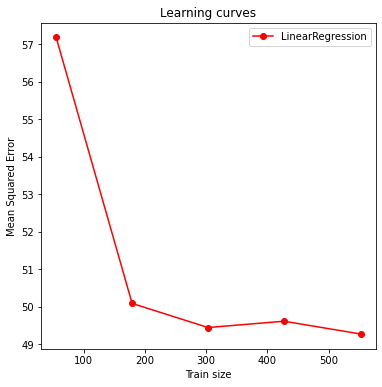

In [9]:
plot_MSEcurve(model_LR, X_train, y_train_r)

On obitent un socre assez bon en ce qui concerne la regression lineaire, on affiche maintenant le rapport de classification grace au seuillage.

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test_b, predict_class(X_test,model_LR), digits=3))


              precision    recall  f1-score   support

           A      0.838     0.795     0.816        39
           B      0.550     0.786     0.647        14
           C      0.867     0.591     0.703        22
           D      0.429     0.214     0.286        14
           E      0.436     0.680     0.531        25
           F      0.367     0.458     0.407        24
           G      0.500     0.188     0.273        16

    accuracy                          0.578       154
   macro avg      0.569     0.530     0.523       154
weighted avg      0.605     0.578     0.570       154



In [11]:
print(f"On constate que les résultats sont assez bas comparés au score obtenu précédemment, cet écart est du au bruit entre les classes, plus précisément concernant les valeurs proches des seuil. ce qui explique aussi le nouveau score obtenu : {round(score(predict_class(X_test, model_LR), y_test_b),2)}")

On constate que les résultats sont assez bas comparés au score obtenu précédemment, cet écart est du au bruit entre les classes, plus précisément concernant les valeurs proches des seuil. ce qui explique aussi le nouveau score obtenu : 57.79


#### matrice de confusion : ####

Energy efficiency   A   B   C  D   E   F  G
row_0                                      
A                  31   3   3  0   0   0  0
B                   6  11   3  0   0   0  0
C                   2   0  13  0   0   0  0
D                   0   0   3  3   1   0  0
E                   0   0   0  8  17  10  4
F                   0   0   0  3   7  11  9
G                   0   0   0  0   0   3  3


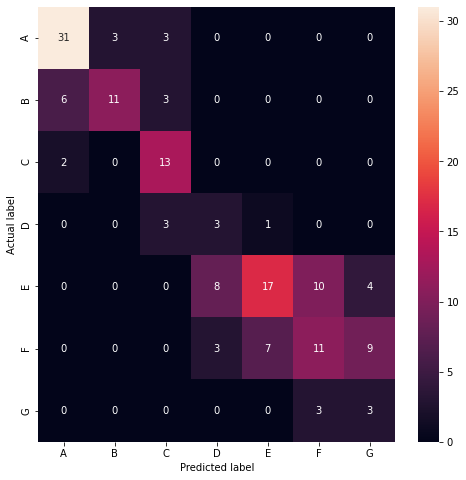

In [12]:
plot_confusion(model_LR)

Le modele a du mal a faire la prediction entre les groupes {A,B,C,D} et {E,F,G}.En effet, chaque label a plus de chance de faire des erreur de classification dans des classes appartenant au meme groupe. En revanche, on constate qu'on a moins de chance de faire une erreur de prediction d'un label en un autre de groupe different

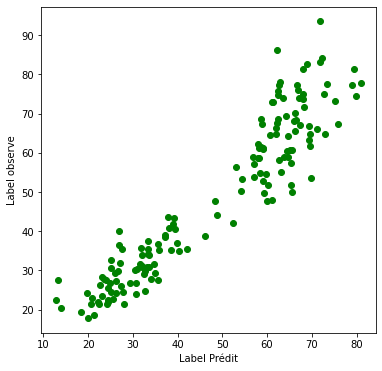

In [13]:
plt.figure(figsize=(6,6))
plt.plot(model_LR.predict(X_test),y_test_r,"o",c = 'g')
plt.xlabel(u"Label Prédit")
plt.ylabel("Label observe")
plt.show()

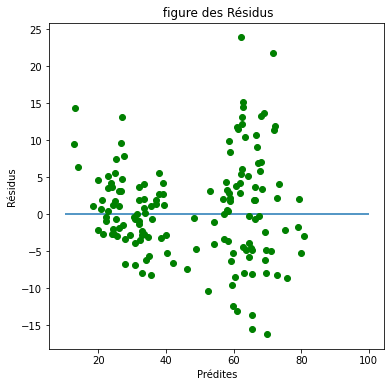

In [14]:
plt.figure(figsize=(6,6))
plt.plot(model_LR.predict(X_test),y_test_r-model_LR.predict(X_test),"o", c ='g')
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.title(" figure des Résidus")
plt.hlines(0,10,100)
plt.show()

Coefficients du modele : 

In [15]:
lreg_coeff = get_coefficients(model_LR)
lreg_coeff

Columns  Coefficient Estimate
0   Relative compactness         -8.663131e+00
1           Surface area         -3.068076e+13
2              Wall area          1.528262e+13
3              Roof area          3.144469e+13
4         Overall height          1.615769e+01
5           Glazing area          4.301388e+00
6                GAD : 0         -4.951497e+10
7                GAD : 1         -4.951497e+10
8                GAD : 2         -4.951497e+10
9                GAD : 3         -4.951497e+10
10               GAD : 4         -4.951497e+10
11               GAD : 5         -4.951497e+10
12                  East         -7.269887e+10
13                 North         -7.269887e+10
14                 South         -7.269887e+10
15                  West         -7.269887e+10

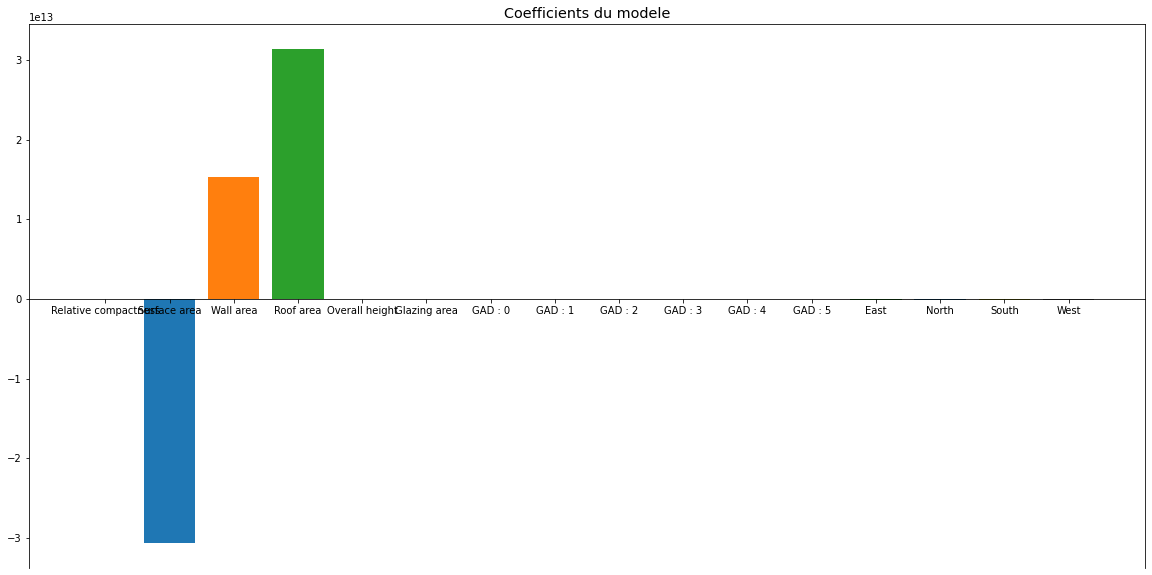

In [16]:
plot_coeffs(lreg_coeff)

On constate que certaines variables ont peu ou pas du tout contribuer au modèle nous allons essayer de régulariser ces coefficients grâce a différentes approche.
<ul>
    <li> Lasso </li>    
    <li> Ridge </li> 
    <li> Elasticnet </li>    
</ul>

### Avec penalisation - lasso ###

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score


param=[{"alpha":[x for x in np.arange(0.01,10,0.01)]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, y_train_r)
regLasso= regLasso.best_estimator_
model_lasso=regLasso.fit(X_train,y_train_r)
prev=regLasso.predict(X_test)
print("MSE =",round(mean_squared_error(prev,y_test_r),4))
print("Score =",round(regLasso.score(X_test,y_test_r),4))


MSE = 45.5093
Score = 0.8848


Une légère amélioration des performance du modèle peut être observé. passons maintenant au performances après le seuillage

In [18]:
print(classification_report(y_test_b, predict_class(X_test,regLasso), digits=3))

              precision    recall  f1-score   support

           A      0.838     0.795     0.816        39
           B      0.524     0.786     0.629        14
           C      0.857     0.545     0.667        22
           D      0.429     0.214     0.286        14
           E      0.425     0.680     0.523        25
           F      0.419     0.542     0.473        24
           G      0.750     0.188     0.300        16

    accuracy                          0.584       154
   macro avg      0.606     0.536     0.528       154
weighted avg      0.633     0.584     0.575       154



In [19]:
print(f"Le score obtenu en classification (aprés seuillage) est de : {round(score(predict_class(X_test,regLasso), y_test_b),2)}%")

Le score obtenu en classification (aprés seuillage) est de : 58.44%


On observe une legere aumentation des performance du modele avec le lasso

#### matrice de confusion : ####

Energy efficiency   A   B   C  D   E   F  G
row_0                                      
A                  31   3   3  0   0   0  0
B                   6  11   4  0   0   0  0
C                   2   0  12  0   0   0  0
D                   0   0   3  3   1   0  0
E                   0   0   0  9  17  10  4
F                   0   0   0  2   7  13  9
G                   0   0   0  0   0   1  3


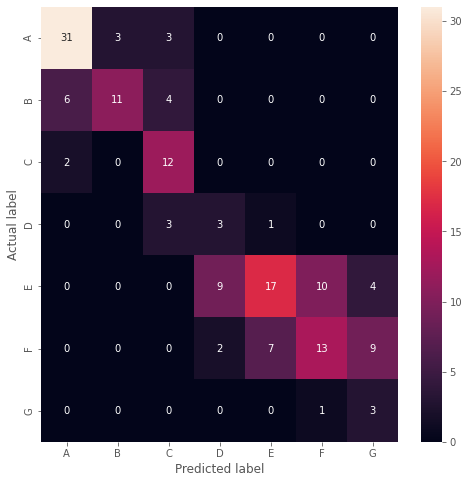

In [20]:
plot_confusion(regLasso)

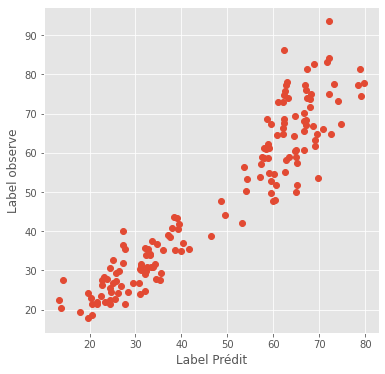

In [21]:
plt.figure(figsize=(6,6))
plt.plot(prev,y_test_r,"o")
plt.xlabel(u"Label Prédit")
plt.ylabel("Label observe")
plt.show()

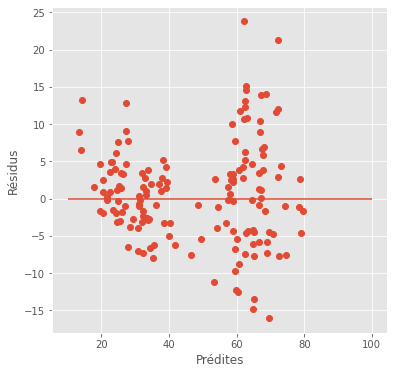

In [22]:
plt.figure(figsize=(6,6))
plt.plot(prev,y_test_r-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,10,100)
plt.show()

In [23]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + " variables et en supprime " +  str(sum(coef == 0)))
lasso_coeff = get_coefficients(regLasso)
lasso_coeff

Lasso conserve 13 variables et en supprime 3


Columns  Coefficient Estimate
0   Relative compactness             -6.105732
1           Surface area             -0.000000
2              Wall area              1.166418
3              Roof area             -5.335781
4         Overall height             16.891640
5           Glazing area              4.354357
6                GAD : 0             -5.591924
7                GAD : 1              0.221533
8                GAD : 2              0.298057
9                GAD : 3              0.000000
10               GAD : 4             -0.000000
11               GAD : 5             -0.480425
12                  East             -0.848581
13                 North              0.116586
14                 South              0.007754
15                  West             -0.043848

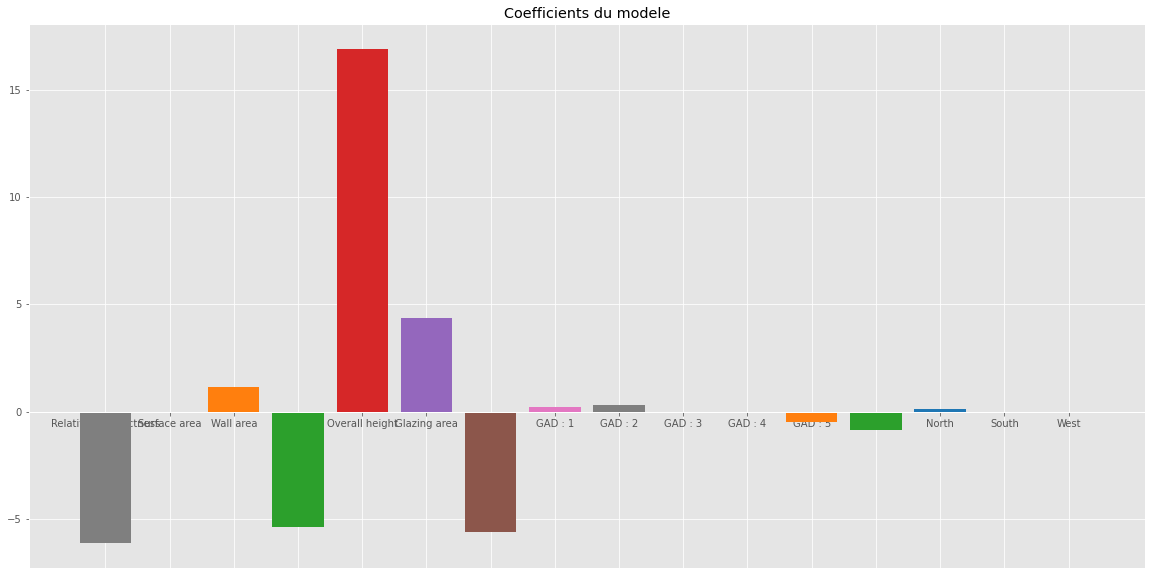

In [24]:
plot_coeffs(lasso_coeff)

Text(0.5, 1.0, 'Coefficients du modèle lasso')

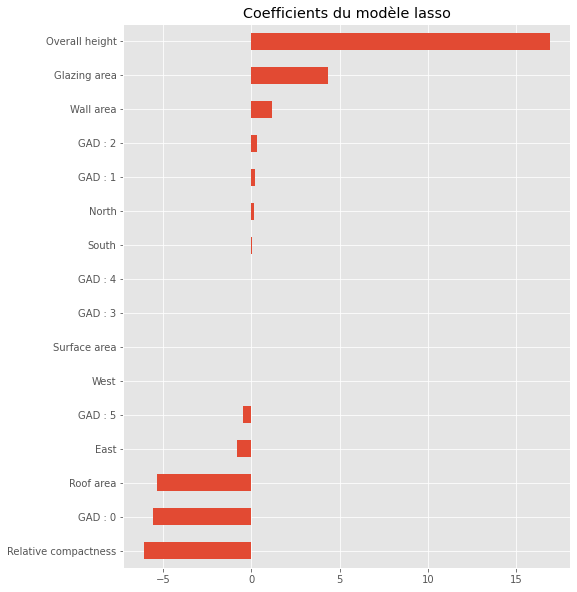

In [25]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

3 variable on été supprimé avec cette approche, on constate aussi qu'une légère amélioration du modèle a été observé

### RIDGE ###

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = { 'alpha': [x for x in np.arange(0.01,10,0.01)]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=5)
ridgeOpt = ridge_regressor.fit(X_train, y_train_r)
ridge_regressor = ridge_regressor.best_estimator_
print("MSE =",round(mean_squared_error(ridge_regressor.predict(X_test),y_test_r),4))
print("Score =",round(ridge_regressor.score(X_test,y_test_r),4))


MSE = 45.9817
Score = 0.8836


In [27]:
print(classification_report(y_test_b, predict_class(X_test,ridgeOpt), digits=3))

              precision    recall  f1-score   support

           A      0.838     0.795     0.816        39
           B      0.550     0.786     0.647        14
           C      0.867     0.591     0.703        22
           D      0.429     0.214     0.286        14
           E      0.450     0.720     0.554        25
           F      0.400     0.500     0.444        24
           G      0.600     0.188     0.286        16

    accuracy                          0.591       154
   macro avg      0.590     0.542     0.534       154
weighted avg      0.623     0.591     0.581       154



In [28]:
score_Ridge = round(score(predict_class(X_test,ridge_regressor), y_test_b),2)
print(f"Le score obtenu en classification (apés seuillage) est de : {score_Ridge}%")

Le score obtenu en classification (apés seuillage) est de : 59.09%


#### matrice de confusion : ####

Energy efficiency   A   B   C  D   E   F  G
row_0                                      
A                  31   3   3  0   0   0  0
B                   6  11   3  0   0   0  0
C                   2   0  13  0   0   0  0
D                   0   0   3  3   1   0  0
E                   0   0   0  8  18  10  4
F                   0   0   0  3   6  12  9
G                   0   0   0  0   0   2  3


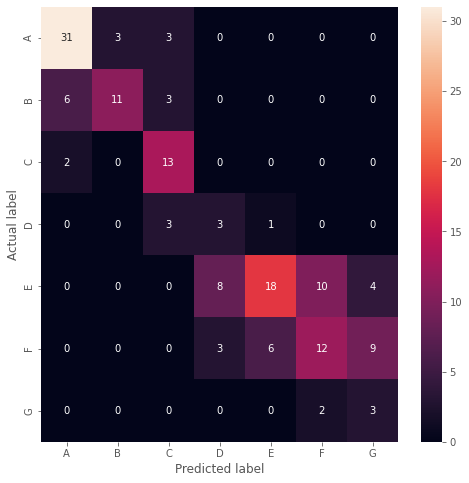

In [29]:
plot_confusion(ridge_regressor)

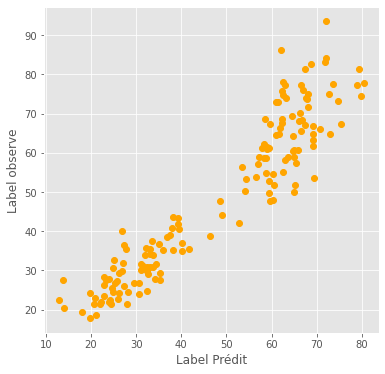

In [30]:
plt.figure(figsize=(6,6))
plt.plot(ridge_regressor.predict(X_test),y_test_r,"o",c = 'orange')
plt.xlabel(u"Label Prédit")
plt.ylabel("Label observe")
plt.show()

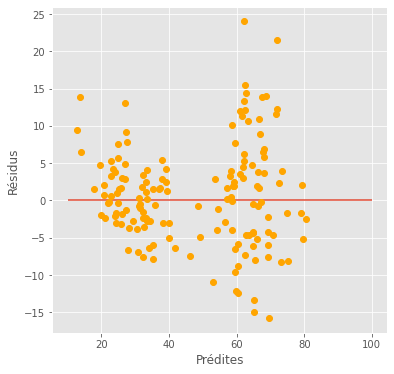

In [31]:
plt.figure(figsize=(6,6))
plt.plot(ridge_regressor.predict(X_test),y_test_r-ridge_regressor.predict(X_test),"o", c ='orange')
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,10,100)
plt.show()

In [32]:
ridge_regressor = Ridge(alpha=ridgeOpt.best_params_['alpha'])
ridge_regressor.fit(X_train, y_train_r)
coef_R = pd.Series(ridge_regressor.coef_, index = X_train.columns)
ridge_coeff = get_coefficients(ridge_regressor)
ridge_coeff

Columns  Coefficient Estimate
0   Relative compactness             -7.738563
1           Surface area             -3.439586
2              Wall area              2.093227
3              Roof area             -4.373366
4         Overall height             15.965697
5           Glazing area              4.333133
6                GAD : 0             -4.932560
7                GAD : 1              1.357329
8                GAD : 2              1.377004
9                GAD : 3              0.964430
10               GAD : 4              0.940145
11               GAD : 5              0.293652
12                  East             -0.757240
13                 North              0.435636
14                 South              0.310466
15                  West              0.011138

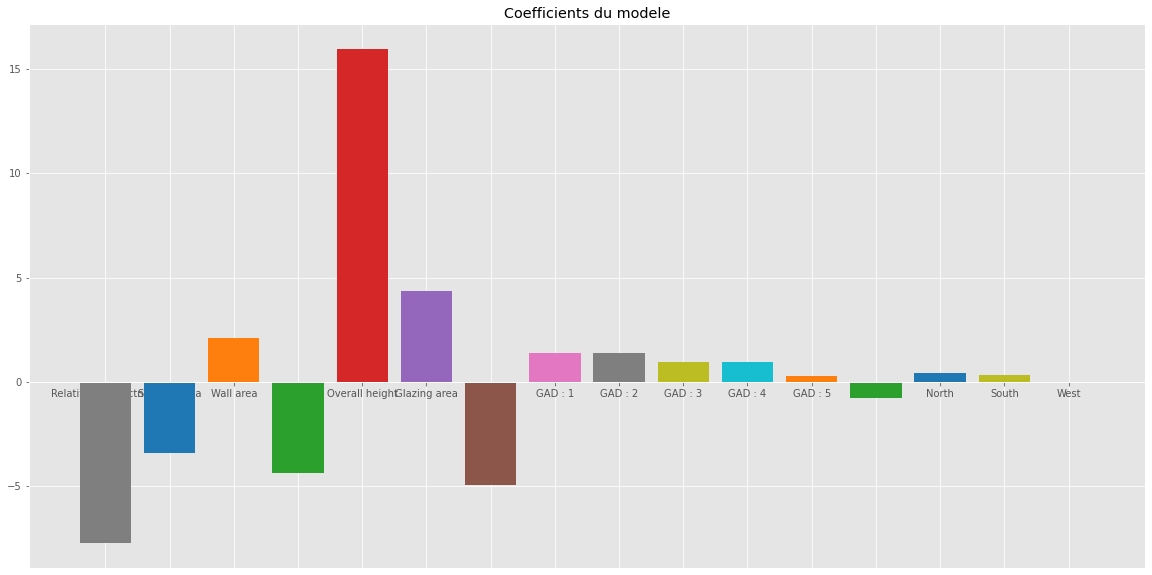

In [33]:
plot_coeffs(ridge_coeff)

Text(0.5, 1.0, 'Coefficients du modèle Ridge')

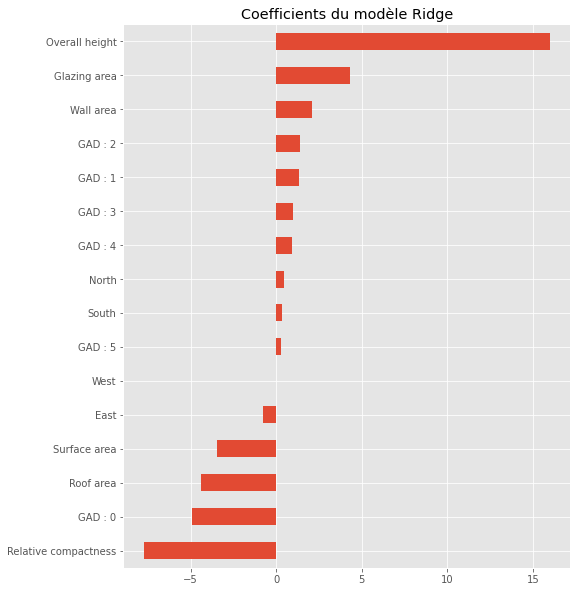

In [34]:
R_coef = coef_R.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
R_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle Ridge")

### Elasticnet ###

In [35]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
parametersGrid = {
                      "alpha": [x for x in np.arange(0.1,1,0.3)],
                      "l1_ratio": np.arange(0.1, 1.0, 0.1)
                 }
elastic_regressor = GridSearchCV(elastic, parametersGrid, scoring='r2', cv=10)

elasticOpt = elastic_regressor.fit(X_train,y_train_r)

print("Meilleur paramètre = %s" % (elastic_regressor.best_params_))
print("MSE =",round(mean_squared_error(elastic_regressor.predict(X_test),y_test_r),4))
print("Score =",round(elastic_regressor.score(X_test,y_test_r),4))

Meilleur paramètre = {'alpha': 0.1, 'l1_ratio': 0.9}
MSE = 47.2138
Score = 0.8804


In [36]:
print(classification_report(y_test_b, predict_class(X_test,elastic_regressor), digits=3))

              precision    recall  f1-score   support

           A      0.838     0.795     0.816        39
           B      0.524     0.786     0.629        14
           C      0.857     0.545     0.667        22
           D      0.333     0.071     0.118        14
           E      0.395     0.680     0.500        25
           F      0.438     0.583     0.500        24
           G      0.750     0.188     0.300        16

    accuracy                          0.578       154
   macro avg      0.591     0.521     0.504       154
weighted avg      0.623     0.578     0.560       154



In [37]:
print(f"Le score obtenu en classification (apés seuillage) est de : {round(score(predict_class(X_test,elastic_regressor), y_test_b),2)}%")

Le score obtenu en classification (apés seuillage) est de : 57.79%


#### matrice de confusion : ####

Energy efficiency   A   B   C   D   E   F  G
row_0                                       
A                  31   3   3   0   0   0  0
B                   6  11   4   0   0   0  0
C                   2   0  12   0   0   0  0
D                   0   0   2   1   0   0  0
E                   0   0   1  12  17   9  4
F                   0   0   0   1   8  14  9
G                   0   0   0   0   0   1  3


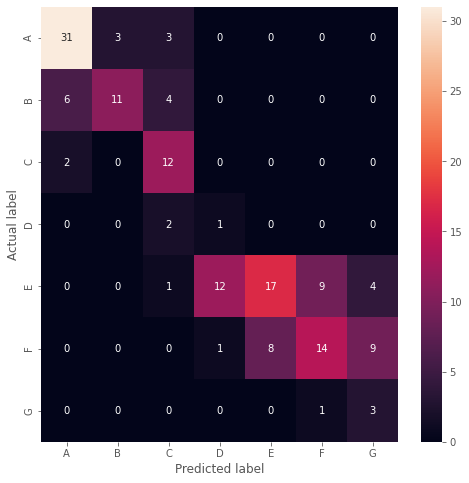

In [38]:
plot_confusion(elastic_regressor)

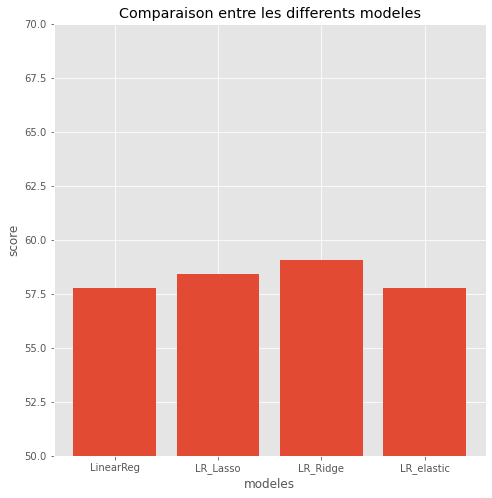

In [39]:
a = [model_LR.score(X_test,y_test_r),regLassOpt.score(X_test,y_test_r), ridge_regressor.score(X_test,y_test_r), elastic_regressor.score(X_test,y_test_r)]
b = [round(score(predict_class(X_test,model_LR), y_test_b),2),round(score(predict_class(X_test,regLassOpt), y_test_b),2),round(score(predict_class(X_test,ridge_regressor), y_test_b),2),round(score(predict_class(X_test,elastic_regressor), y_test_b),2)]
langs = ['LinearReg', 'LR_Lasso', 'LR_Ridge', 'LR_elastic']
fig = plt.figure(figsize = (6,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,b)
plt.ylim(50,70)
plt.xlabel('modeles')
plt.ylabel('score')
plt.title('Comparaison entre les differents modeles')
plt.show()

On remarque apres comparaison des scores que le modele de régression lineaire avec penalisation l2 est le plus performant. 

###  Support Vector Machine ###

<p> Dans cette partie nous allons tester le modèle de support vector machine, plus précisément le support vector regressor. nous essaierons diffèrent paramètres.</p>


##### ACP pour la visualisation #####
<p> Nous appliquerons en premier lieu l'analyse en composant principal vu lors de l'analyse exploratoire des données. ceci a pour but de visualiser les bords de notre modèle. </p>

In [40]:
import numpy as np

acp_df = pd.concat([X_train, y_train_r], axis=1)
acp_df = acp_df.drop(acp_df.columns[np.arange(6, 16)], axis = 1,)
acp_df.head()

Relative compactness Surface area  Wall area Roof area Overall height  \
60              0.531311    -0.745559 -0.0780456 -0.689514              1   
618              -1.1574      1.29257   0.534939   1.00118             -1   
346              0.84627      -1.0325  -0.700866 -0.666789              1   
294              1.23387     -1.18323   0.113668  -1.20972              1   
231             -1.02421      1.09848  0.0316101   1.05643             -1   

    Glazing area   Energy  
60     -0.991289  50.4874  
618      1.23737  42.2901  
346     0.082403  57.9177  
294     0.118502  64.3365  
231     -1.02533  27.1754

In [43]:
X_train_acp = X2D[['pc1','pc2']]
y_train_acp = X2D['Energy_label']
# Transformation des labels en chiffres pour pouvoir utiliser les SVC de l'API de sklearn
y_train_nb = y_train_acp.replace(["A","B","C", "D", "E", "F", "G"], np.arange(1,8))

from matplotlib.colors import LinearSegmentedColormap

# Fonctions qui vont nous permettre de plot les SVC en deux dimensions
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Fonction qui permet de plot les contours des classificateurs
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Création des couleurs pour les différentes classes estimées par les classificateurs
def create_cmap():
    cmap_name = 'my_list'
    colors = ["cornflowerblue", "burlywood", "limegreen", "indianred", "mediumpurple", "chocolate", "pink"]  
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=7)
def plot_svc(model, title):
    fig, ax = plt.subplots(figsize=(7,7))# title for the plots
    
    # Set-up grid for plotting.
    X0, X1 = X_train_acp.pc1, X_train_acp.pc2
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, cmap=create_cmap(), alpha=0.8)
    plot_classification_pca()

    ax.set_xlim(-3.5,3.5)
    ax.set_ylim(-3.5,3.5)
    ax.set_title(title)
    plt.show()


Text(0.5, 1.0, 'ACP sur 2 composantes')

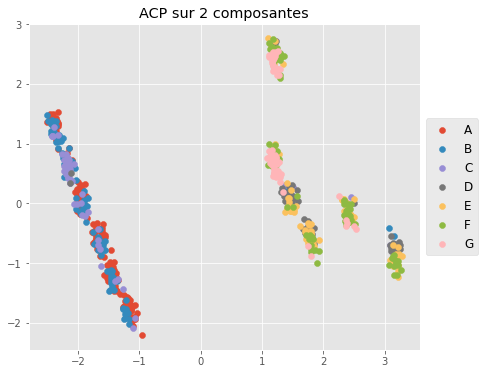

In [42]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


pca = PCA(n_components=2, svd_solver="full")

X2D = pca.fit_transform(acp_df.drop(['Energy'], axis=1))

d = {"pc1": X2D[:, 0], "pc2": X2D[:, 1], "Energy_label": set_letters_pred(acp_df['Energy'])}
X2D = pd.DataFrame(data=d)

plt.figure(figsize=(7,6))

def plot_classification_pca(subplot=plt):
    list_labels = ["A","B","C", "D", "E", "F", "G"]
    for value in list_labels:
        subplot.scatter(X2D["pc1"].where(X2D["Energy_label"]==value), X2D["pc2"].where(X2D["Energy_label"]==value),  label=value)
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)
        
plot_classification_pca()
plt.title("ACP sur 2 composantes")

Test des differents kernels : 

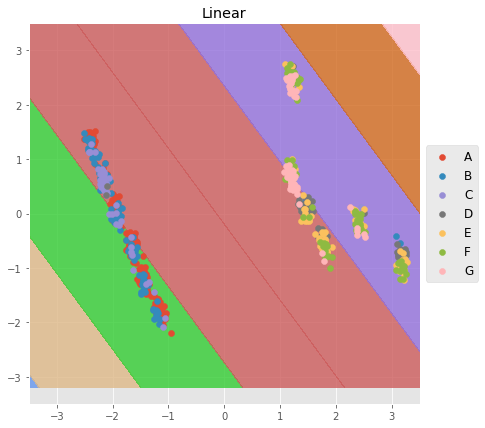

In [44]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(X_train_acp, y_train_r)
plot_svc(svr, 'Linear')

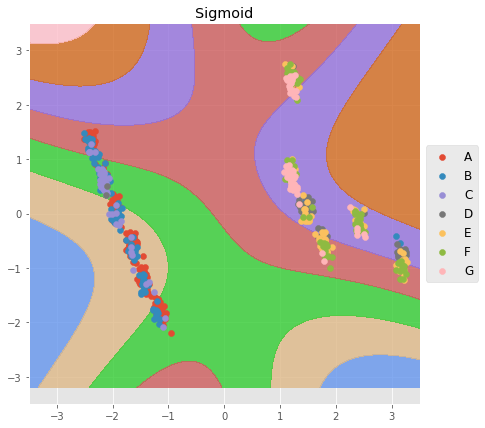

In [45]:
svr = SVR(kernel = 'sigmoid')
svr.fit(X_train_acp, y_train_r)
plot_svc(svr, 'Sigmoid')

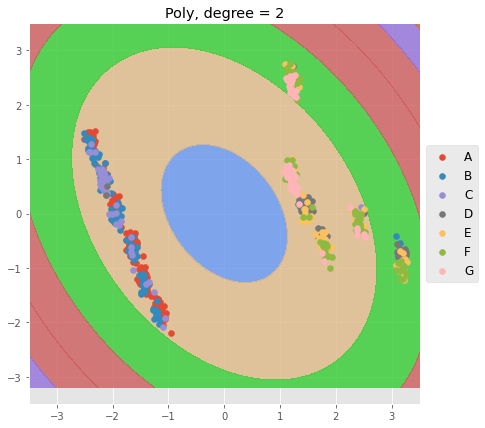

In [46]:
svr = SVR(kernel = 'poly', degree = 2, gamma = 10 )
svr.fit(X_train_acp, y_train_r)
plot_svc(svr, 'Poly, degree = 2')

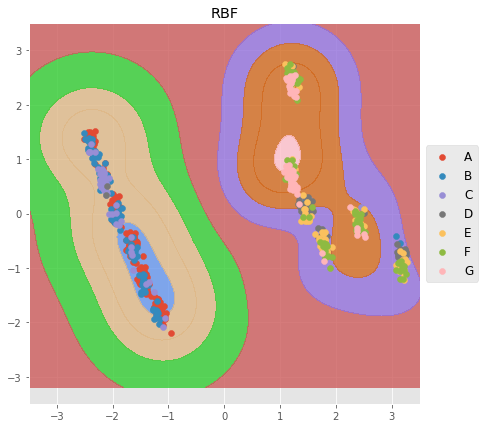

In [47]:
svr = SVR(kernel = 'rbf', gamma = 1)
svr.fit(X_train_acp, y_train_r)
plot_svc(svr, 'RBF')

<p> On remarque que les modèles avec les noyau linéaire et sigmoïde ont du mal a catégoriser les différentes classes. le modèle avec noyau polynomial est moins bon que le rbf mais nous le retesterons en prenant diffèrent hyperparamètres. </p>

In [48]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001], 
             'degree':np.arange(1,4,1),
            'kernel' : ('poly', 'rbf')
             } 
grid_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid, n_jobs=-1)
grid_svr.fit(X_train_acp, y_train_r)




GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': array([1, 2, 3]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('poly', 'rbf')})

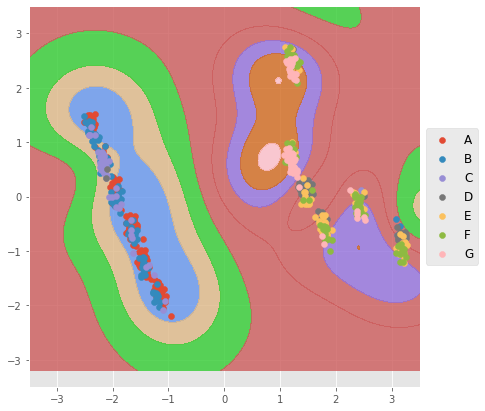

In [49]:
plot_svc(grid_svr.best_estimator_, '')

In [50]:
param = grid_svr.best_params_
param

{'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

Les test effectués avec l'acp nous ont permis de faire le choix au niveau du kernel, nous ferons ensuite les test sur le jeu de données complet.

##### Test du modeles sans acp #####

In [51]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001], 
             } 

grid_svropt= GridSearchCV(estimator=SVR(kernel= 'rbf'), param_grid=param_grid, n_jobs=-1)
grid_svropt.fit(X_train, y_train_r)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]})

In [52]:
print("meilleurs parametres : ",grid_svropt.best_params_)
print("SCORE =",grid_svropt.score(X_test, y_test_r))
print("MSE=",mean_squared_error(y_test_r,grid_svropt.predict(X_test)))

meilleurs parametres :  {'C': 10, 'gamma': 0.1}
SCORE = 0.8990423100181808
MSE= 39.86967563619064


In [53]:
score_svr = round(score(predict_class(X_test,grid_svropt), y_test_b),2)
print(f"Le score obtenu en classification (apés seuillage) est de : {score_svr}%")

Le score obtenu en classification (apés seuillage) est de : 55.19%


In [54]:
print(classification_report(predict_class(X_test,grid_svropt),y_test_b,  digits=3))

              precision    recall  f1-score   support

           A      0.821     0.865     0.842        37
           B      0.786     0.367     0.500        30
           C      0.273     0.857     0.414         7
           D      0.214     0.429     0.286         7
           E      0.520     0.419     0.464        31
           F      0.542     0.406     0.464        32
           G      0.438     0.700     0.538        10

    accuracy                          0.552       154
   macro avg      0.513     0.578     0.501       154
weighted avg      0.618     0.552     0.556       154



#### matrice de confusion : ####

Energy efficiency   A   B   C  D   E   F  G
row_0                                      
A                  32   3   2  0   0   0  0
B                   7  11  12  0   0   0  0
C                   0   0   6  1   0   0  0
D                   0   0   2  3   2   0  0
E                   0   0   0  7  13   9  2
F                   0   0   0  3   9  13  7
G                   0   0   0  0   1   2  7


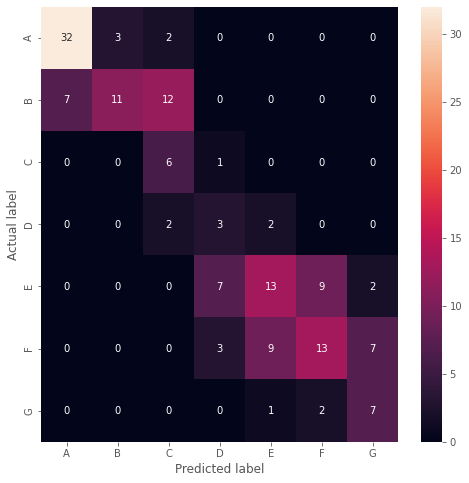

In [55]:
plot_confusion(grid_svropt)

Le modele rencontre des difficultés a predire les classe D qui est souvent confondu avec les labels C et E

### Decision Tree ###

<p>Dans cette partie nous allons tester un modele d'arbre de décision sur notre jeu de données et analyser ses performances</p>

In [56]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train_r)

print("SCORE =",DT_model.score(X_test, y_test_r))
print("MSE=",mean_squared_error(y_test_r,DT_model.predict(X_test)))


SCORE = 0.9020138510291076
MSE= 38.69617041567076


In [57]:
from sklearn.model_selection import cross_val_score
import numpy as np

print('Affichage de la validation croisée pour 3 lots :')
print(cross_val_score(DT_model, X_train, y_train_r, cv=3))
print('Moyenne = %.2f' % np.average(cross_val_score(DT_model, X_train, y_train_r, cv=3)))

print("=============================================================")

print("SCORE =",DT_model.score(X_test, y_test_r))
print("MSE=",mean_squared_error(y_test_r,DT_model.predict(X_test)))

Affichage de la validation croisée pour 3 lots :
[0.89740292 0.88835586 0.88925286]
Moyenne = 0.88
SCORE = 0.9020138510291076
MSE= 38.69617041567076


In [58]:
score_DT = round(score(predict_class(X_test,DT_model), y_test_b),2)
print(f"Le score obtenu en classification (apés seuillage) est de : {score_DT}%")

Le score obtenu en classification (apés seuillage) est de : 53.25%


In [59]:
print(classification_report(y_test_b, predict_class(X_test,DT_model), digits=3))

              precision    recall  f1-score   support

           A      0.775     0.795     0.785        39
           B      0.217     0.357     0.270        14
           C      0.700     0.318     0.438        22
           D      0.588     0.714     0.645        14
           E      0.448     0.520     0.481        25
           F      0.400     0.333     0.364        24
           G      0.533     0.500     0.516        16

    accuracy                          0.532       154
   macro avg      0.523     0.505     0.500       154
weighted avg      0.560     0.532     0.533       154



In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

def graphviz(out_file_name, tree):
    PATH = "C:\\Users\\User\\Documents\\Valdom\\ML\\Projet\\Python\\Graphiz\\"
    export_graphviz(
    tree, 
    out_file=PATH+out_file_name+".dot",
    feature_names=X_train.columns,
    rounded=True,
    filled= True
    )
    print("Graphiz créé")
    
graphviz(out_file_name="reg_full_tree", tree=DT_model)

In [60]:
from IPython.display import IFrame
IFrame('Graphiz\\reg_full_tree.pdf', width=1000, height=300)

In [61]:
path = DT_model.cost_complexity_pruning_path(X_train, y_train_r)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureté des feuilles vs alpha effectif dans le training set')

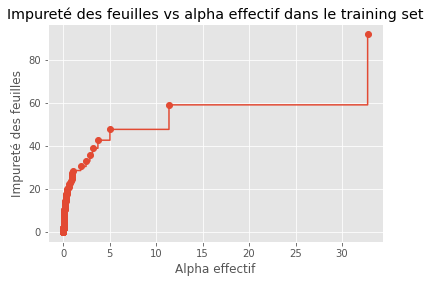

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

ax.set_xlabel("Alpha effectif")
ax.set_ylabel("Impureté des feuilles")
ax.set_title("Impureté des feuilles vs alpha effectif dans le training set")

Des valeurs plus élevées de ccp_alpha augmentent le nombre de nœuds élagués

In [63]:
clfs = []
for ccp_alpha in ccp_alphas:
    tree_reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_reg.fit(X_train, y_train_r)
    clfs.append(tree_reg)
print("Le nombre de noeuds dans le dernier arbre est : {} avec ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
print("Le nombre de noeuds dans l'avant-dernier arbre est : {} avec ccp_alpha: {}".format(
      clfs[-2].tree_.node_count, ccp_alphas[-2]))

Le nombre de noeuds dans le dernier arbre est : 1 avec ccp_alpha: 301.35177673767635
Le nombre de noeuds dans l'avant-dernier arbre est : 5 avec ccp_alpha: 32.76157054717337


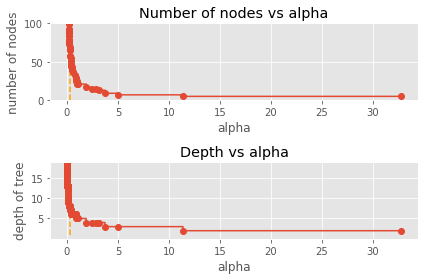

In [64]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[0].set_ylim(0,100)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].vlines(0.3, 0.87, 15, linestyles="--", color='orange')
ax[0].vlines(0.3, 0.87, 1000, linestyles="--", color='orange')

ax[1].set_title("Depth vs alpha")
fig.tight_layout()

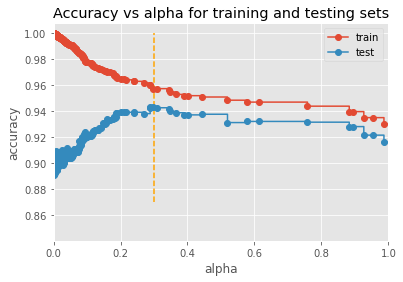

In [65]:
train_scores = [clf.score(X_train, y_train_r) for clf in clfs]
test_scores = [clf.score(X_test, y_test_r) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_xlim(0,1,0.1)
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.vlines(0.3, 0.87, 1, linestyles="--", color='orange')
ax.legend()
plt.show()

Nous allons choisir un ccp_alpha = 0.3 pour construire notre arbre. cette valeur correspond a 50 en nombre de noeud et a une profondeur de 8 environ.

In [66]:
opt_tree = DecisionTreeRegressor(ccp_alpha=0.3)
opt_tree.fit(X_train, y_train_r)


DecisionTreeRegressor(ccp_alpha=0.3)

In [67]:
print("SCORE =",opt_tree.score(X_test, y_test_r))
print("MSE=",mean_squared_error(y_test_r,opt_tree.predict(X_test)))

SCORE = 0.9435364799336079
MSE= 22.29827396734212


In [68]:
score_OT = round(score(predict_class(X_test,opt_tree), y_test_b),2)
print(f"Le score obtenu en classification (apés seuillage) est de : {score_OT}%")

Le score obtenu en classification (apés seuillage) est de : 64.94%


In [69]:
print("Nous avons supprimé {} couches de profondeur pour obtenir un arbre optimal.".
      format((DT_model.tree_.max_depth-opt_tree.tree_.max_depth)))
print("Nous avons élagué {} noeuds pour obtenir un arbre de décision optimal.".
      format((DT_model.tree_.node_count-opt_tree.tree_.node_count)))

Nous avons supprimé 11 couches de profondeur pour obtenir un arbre optimal.
Nous avons élagué 1170 noeuds pour obtenir un arbre de décision optimal.


In [70]:
print(classification_report(y_test_b, predict_class(X_test,opt_tree), digits=3))

              precision    recall  f1-score   support

           A      0.892     0.846     0.868        39
           B      0.389     0.500     0.438        14
           C      0.700     0.636     0.667        22
           D      0.500     0.714     0.588        14
           E      0.571     0.320     0.410        25
           F      0.556     0.833     0.667        24
           G      0.889     0.500     0.640        16

    accuracy                          0.649       154
   macro avg      0.642     0.621     0.611       154
weighted avg      0.678     0.649     0.645       154



#### matrice de confusion : ####

Energy efficiency   A  B   C   D  E   F  G
row_0                                     
A                  33  4   0   0  0   0  0
B                   4  7   7   0  0   0  0
C                   2  3  14   1  0   0  0
D                   0  0   1  10  9   0  0
E                   0  0   0   3  8   3  0
F                   0  0   0   0  8  20  8
G                   0  0   0   0  0   1  8


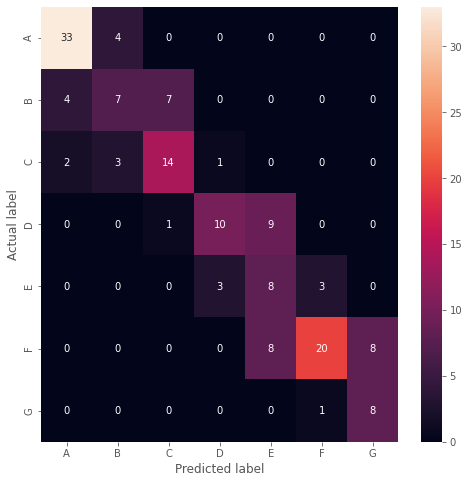

In [71]:
plot_confusion(opt_tree)

En mettant a jour le parametre ccp_aplha,on peut remarquer une amelioration des performances du modele.On constate aussi En comparant le f1-score des differentes classes que le modele a des difficultées a prédire les classes B.

### Ensemble Learning  ###

Dans cette partie nous ferons des test sur des methodes dites d'ensemble learning   a savoir:
<ul>
    <li>Random Forest</li>
    <li>Boosting </li>
</ul>

#### Random Forest ####

In [72]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': np.arange(1,7),
    'n_estimators': [x for x in range (20,200,20)]
}

rf = RandomForestRegressor(max_depth=None, oob_score=True, max_features='sqrt', n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train_r)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   37.2s finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt', n_jobs=-1,
                                             oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180]},
             verbose=2)

In [73]:
print("SCORE =",grid_search_rf.score(X_test, y_test_r))
print("MSE=",mean_squared_error(y_test_r,grid_search_rf.predict(X_test)))

SCORE = 0.9483943193452746
MSE= 20.379841783813212


In [74]:
score_rf = round(score(predict_class(X_test,grid_search_rf), y_test_b),2)
print(f"Le score obtenu en classification (apés seuillage) est de : {score_rf}%")

Le score obtenu en classification (apés seuillage) est de : 63.64%


In [75]:
print(classification_report(predict_class(X_test,grid_search_rf),y_test_b,  digits=3))

              precision    recall  f1-score   support

           A      0.821     0.762     0.790        42
           B      0.286     0.222     0.250        18
           C      0.500     0.846     0.629        13
           D      0.714     0.714     0.714        14
           E      0.800     0.606     0.690        33
           F      0.542     0.565     0.553        23
           G      0.500     0.727     0.593        11

    accuracy                          0.636       154
   macro avg      0.595     0.635     0.603       154
weighted avg      0.652     0.636     0.635       154



#### matrice de confusion : ####

Energy efficiency   A  B   C   D   E   F  G
row_0                                      
A                  32  8   2   0   0   0  0
B                   7  4   7   0   0   0  0
C                   0  2  11   0   0   0  0
D                   0  0   2  10   2   0  0
E                   0  0   0   4  20   8  1
F                   0  0   0   0   3  13  7
G                   0  0   0   0   0   3  8


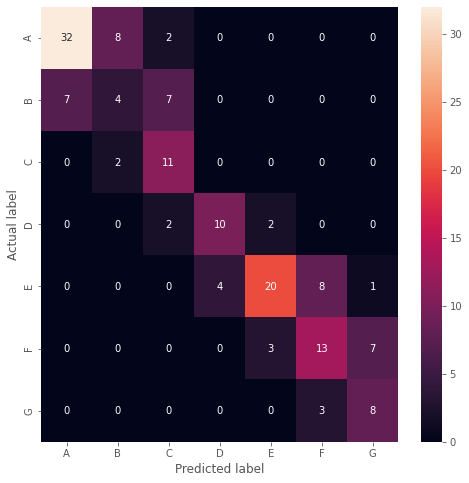

In [76]:
plot_confusion(grid_search_rf.best_estimator_)

On remarque que le modele a du mal a prédire les classes B. nous allons maintenant essayer d'optimiser le modele selon le nombre d'estimateurs

C:\Users\rida-\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


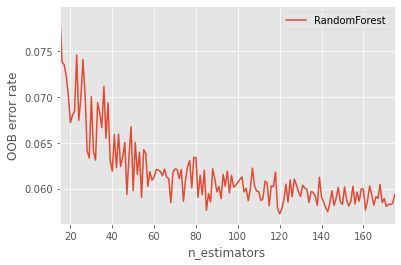

In [77]:
from collections import OrderedDict

ensemble_clfs = [ ("RandomForest", grid_search_rf.best_estimator_ )]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train_r)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()
                    

On prend le n_estimator minimisant l'erreur out of bag

In [78]:
min_estim = min(error_rate["RandomForest"], key = lambda t: t[1])
min_estim

(120, 0.05723550383717935)

In [79]:
rfOpt = RandomForestRegressor(n_estimators= min_estim[0], ccp_alpha=0.3)
rfOpt.fit(X_train, y_train_r)

print("SCORE training set =",rfOpt.score(X_train, y_train_r))
print("SCORE test set =",rfOpt.score(X_test, y_test_r))



y_pred = rfOpt.predict(X_test)
y_pred_label = set_letters_pred(y_pred)

score_rf = round(score(predict_class(X_test,rfOpt), y_test_b),2)
print("SCORE classification =",score_rf)



SCORE training set = 0.9667236413850999
SCORE test set = 0.9490486789036778
SCORE classification = 64.94


In [80]:

print(classification_report(y_test_b, predict_class(X_test,rfOpt), digits=3))

              precision    recall  f1-score   support

           A      0.868     0.846     0.857        39
           B      0.304     0.500     0.378        14
           C      0.786     0.500     0.611        22
           D      0.727     0.571     0.640        14
           E      0.609     0.560     0.583        25
           F      0.531     0.708     0.607        24
           G      0.769     0.625     0.690        16

    accuracy                          0.649       154
   macro avg      0.656     0.616     0.624       154
weighted avg      0.687     0.649     0.658       154



Le modele a du mal a predire la classe B  F1-score faible par raport autres classes 

#### matrice de confusion : ####

Energy efficiency   A  B   C  D   E   F   G
row_0                                      
A                  33  5   0  0   0   0   0
B                   6  7  10  0   0   0   0
C                   0  2  11  1   0   0   0
D                   0  0   1  8   2   0   0
E                   0  0   0  5  14   4   0
F                   0  0   0  0   9  17   6
G                   0  0   0  0   0   3  10


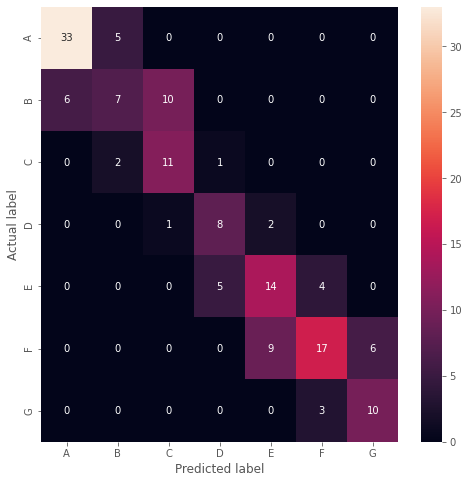

In [81]:
plot_confusion(rfOpt)

On constate une legere amelioration de la precision du modele bien qu'il rencontre toujours des difficultées a prédire la classe B

<p> Nous allons ensuite utiliser deux classificateurs dits "boosting" pour notre dataset : 
<ul><li> AdaBoost </li>
    <li> Gradient Boosting </li>
    <li> XGBoost </li>
</ul>
</p>

### AdaBoost ###

In [82]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada_param = {'n_estimators': 100}
adaboost = AdaBoostRegressor(**ada_param)
adaboost.fit(X_train,y_train_r)

print(classification_report(y_test_b, predict_class(X_test,adaboost), digits=3))
print("SCORE =",adaboost.score(X_test, y_test_r))
score_adaboost = score(set_letters_pred(adaboost.predict(X_test)), y_test_b)




              precision    recall  f1-score   support

           A      0.846     0.846     0.846        39
           B      0.350     0.500     0.412        14
           C      0.800     0.545     0.649        22
           D      0.467     0.500     0.483        14
           E      0.478     0.440     0.458        25
           F      0.593     0.667     0.627        24
           G      0.733     0.688     0.710        16

    accuracy                          0.630       154
   macro avg      0.610     0.598     0.598       154
weighted avg      0.649     0.630     0.634       154

SCORE = 0.92202086243535


In [83]:
print("SCORE classification =",score_adaboost)

SCORE classification = 62.98701298701299


Energy efficiency   A  B   C  D   E   F   G
row_0                                      
A                  33  6   0  0   0   0   0
B                   5  7   8  0   0   0   0
C                   1  1  12  1   0   0   0
D                   0  0   2  7   6   0   0
E                   0  0   0  6  11   5   1
F                   0  0   0  0   7  16   4
G                   0  0   0  0   1   3  11


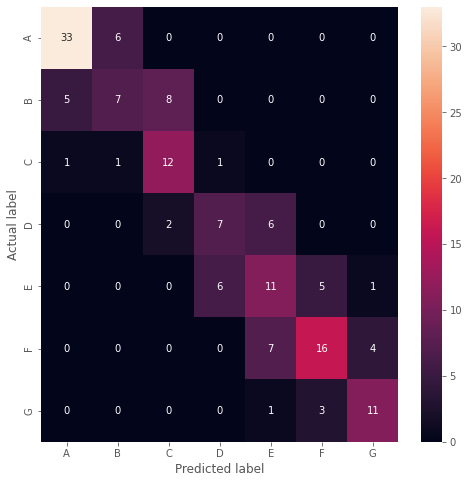

In [84]:
plot_confusion(adaboost)

Au vue du score f1 et de la matrice de confusion ci-dessus, on constate que l'estimisateur donne des prevision "moyennes" : a part la classe A, il a tendance a faire des erreurs de classification entre les classes appartenant au groupes {A,B,C,D} et {E,F,G}

### Gradient Boosting ###

In [85]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,  'loss': 'ls'}
gradboost = GradientBoostingRegressor(**params)
gradboost.fit(X_train, y_train_r)
print("GradienBoost SCORE =",gradboost.score(X_test, y_test_r))
mse = mean_squared_error(y_test_r, gradboost.predict(X_test))
print("MSE: %.4f" % mse)

GradienBoost SCORE = 0.9447213126047377
MSE: 21.8304


In [86]:
score_gradboost = score(set_letters_pred(gradboost.predict(X_test)), y_test_b)
print("SCORE classification =",score_gradboost)

SCORE classification = 63.63636363636363


Nous allons maintenent visualiser l'importance des features dans le modele ainsi que l'evolution de la loss pour le training set et le test set

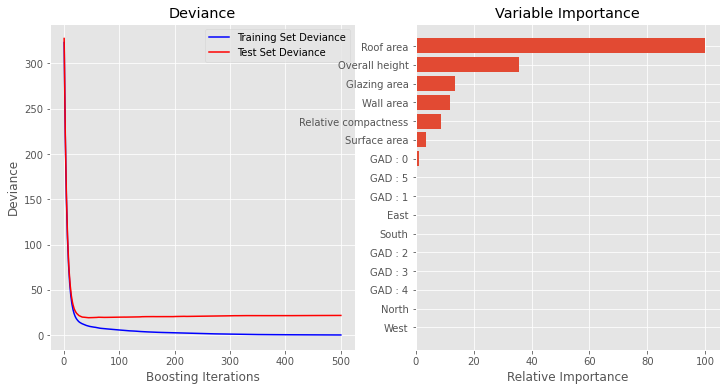

In [87]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gradboost.staged_predict(X_test)):
    test_score[i] = gradboost.loss_(y_test_r, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gradboost.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


feature_importance = gradboost.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [88]:
print(classification_report(y_test_b, predict_class(X_test,gradboost), digits=3))

              precision    recall  f1-score   support

           A      0.773     0.872     0.819        39
           B      0.067     0.071     0.069        14
           C      0.688     0.500     0.579        22
           D      0.714     0.714     0.714        14
           E      0.652     0.600     0.625        25
           F      0.577     0.625     0.600        24
           G      0.750     0.750     0.750        16

    accuracy                          0.636       154
   macro avg      0.603     0.590     0.594       154
weighted avg      0.639     0.636     0.634       154



Energy efficiency   A   B   C   D   E   F   G
row_0                                        
A                  34  10   0   0   0   0   0
B                   5   1   9   0   0   0   0
C                   0   3  11   1   1   0   0
D                   0   0   2  10   2   0   0
E                   0   0   0   3  15   5   0
F                   0   0   0   0   7  15   4
G                   0   0   0   0   0   4  12


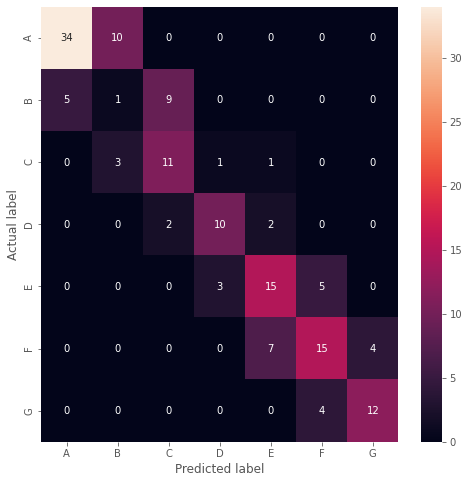

In [89]:
plot_confusion(gradboost)

On voit clairement que le modele a du mal a predire la classe B. nous essairons maintenent differentes combinaisons des parametres du modeles et choisirons celle qui donne le meilleur résultat

#### matrice de confusion : ####

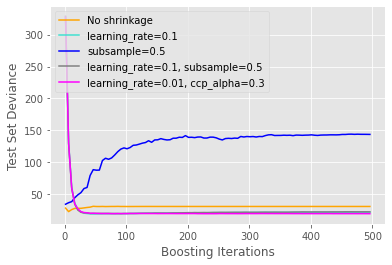

In [90]:

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.01, ccp_alpha=0.3', 'magenta',
                               {'learning_rate': 0.1, 'ccp_alpha': 0.3})]:
    params = dict(params)
    params.update(setting)

    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train_r)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test_r, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

In [91]:
params_Opt ={'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,  'loss': 'ls', 'learning_rate': 0.1,'ccp_alpha': 0.3}

gradboostOpt = GradientBoostingRegressor(**params_Opt)
gradboostOpt.fit(X_train, y_train_r)

gradboostOpt.score(X_test, y_test_r)

0.9478409520021817

In [92]:
score_gradboostopt = score(set_letters_pred(gradboostOpt.predict(X_test)), y_test_b)
print("SCORE classification =",score_gradboostopt)

SCORE classification = 67.53246753246754


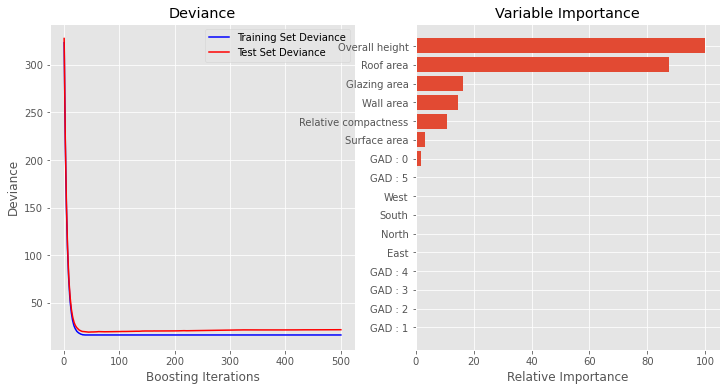

In [93]:
test_score_opt = np.zeros((params_Opt['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gradboostOpt.staged_predict(X_test)):
    test_score_opt[i] = gradboostOpt.loss_(y_test_r, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params_Opt['n_estimators']) + 1, gradboostOpt.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params_Opt['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


feature_importance = gradboostOpt.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [94]:
print(classification_report(y_test_b, predict_class(X_test,gradboostOpt), digits=3))

              precision    recall  f1-score   support

           A      0.892     0.846     0.868        39
           B      0.333     0.571     0.421        14
           C      0.769     0.455     0.571        22
           D      0.750     0.643     0.692        14
           E      0.643     0.720     0.679        25
           F      0.567     0.708     0.630        24
           G      0.900     0.562     0.692        16

    accuracy                          0.675       154
   macro avg      0.693     0.644     0.651       154
weighted avg      0.720     0.675     0.683       154



#### matrice de confusion : ####

Energy efficiency   A  B   C  D   E   F  G
row_0                                     
A                  33  4   0  0   0   0  0
B                   6  8  10  0   0   0  0
C                   0  2  10  1   0   0  0
D                   0  0   2  9   1   0  0
E                   0  0   0  4  18   6  0
F                   0  0   0  0   6  17  7
G                   0  0   0  0   0   1  9


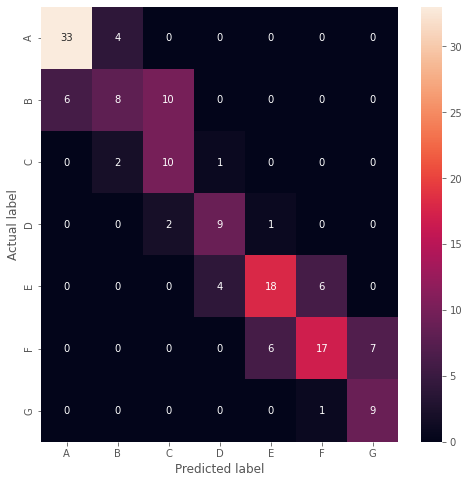

In [95]:
plot_confusion(gradboostOpt)

en mettant a jour les hyperparametres, on obtient un nouveau modele avec un score legerement meilleur. un meilleur f1 score pour la classe B et une legere hausse de l'accuracy.

### XGBOOST ###

In [96]:
data_xgboost = dataset_df.copy()

X_train_XG, X_test_XG, y_train_r_XG, y_test_r_XG = train_test_split(data_xgboost[data_xgboost.columns[0:16]], data_xgboost['Energy'], test_size=0.20, random_state=42)
_, _, y_train_b_XG, y_test_b_XG = train_test_split(dataset_df[data_xgboost.columns[0:16]], data_xgboost['Energy efficiency'], test_size=0.20, random_state=42) 

X_train_XG = X_train_XG.apply(pd.to_numeric, errors='coerce')
X_test_XG = X_test_XG.apply(pd.to_numeric, errors='coerce')
y_train_r_XG = y_train_r_XG.apply(pd.to_numeric, errors='coerce')
y_test_r_XG = y_test_r_XG.apply(pd.to_numeric, errors='coerce')

In [97]:
data_xgboost.head()

Relative compactness Surface area  Wall area Roof area Overall height  \
0              2.06355     -1.59779  -0.269786  -1.42786              1   
1               2.0694     -1.71823  -0.422547  -1.47112              1   
2              2.03073     -1.75999  -0.340612  -1.55169              1   
3              2.01447     -1.72899  -0.581134  -1.40454              1   
4              1.30869     -1.34281 -0.0477237  -1.28699              1   

  Glazing area GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North  \
0     -1.64028       1       0       0       0       0       0    0     1   
1     -1.83179       1       0       0       0       0       0    1     0   
2     -1.76649       1       0       0       0       0       0    0     0   
3     -1.76117       1       0       0       0       0       0    0     0   
4     -1.81079       1       0       0       0       0       0    0     1   

  South West   Energy Energy efficiency  
0     0    0  34.2639                 B  
1     0    0  34.5898                 B  
2     1    0   38.778                 C  
3     0    1  37.9478                 C  
4     0    0  47.6759                 D

In [98]:
import xgboost as xgb

params_xg ={'n_estimators': 500,'subsample': 0.5, 'max_depth': 4, 'learning_rate': 0.1,'gamma': 0.0001}


xg_reg = xgb.XGBRegressor(**params_xg)

xg_reg.fit(X_train_XG,y_train_r_XG)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
score_xgb = score(set_letters_pred(xg_reg.predict(X_test_XG)), y_test_b)
print(f"Score : {score_xgb}")

Score : 69.48051948051948


In [100]:
print(classification_report(y_test_b, predict_class(X_test_XG,xg_reg), digits=3))

              precision    recall  f1-score   support

           A      0.821     0.821     0.821        39
           B      0.353     0.429     0.387        14
           C      0.722     0.591     0.650        22
           D      0.692     0.643     0.667        14
           E      0.739     0.680     0.708        25
           F      0.633     0.792     0.704        24
           G      0.786     0.688     0.733        16

    accuracy                          0.695       154
   macro avg      0.678     0.663     0.667       154
weighted avg      0.706     0.695     0.697       154



Energy efficiency   A  B   C  D   E   F   G
row_0                                      
A                  32  6   1  0   0   0   0
B                   5  6   6  0   0   0   0
C                   2  2  13  1   0   0   0
D                   0  0   2  9   2   0   0
E                   0  0   0  4  17   2   0
F                   0  0   0  0   6  19   5
G                   0  0   0  0   0   3  11


Text(0.5, 51.0, 'Predicted label')

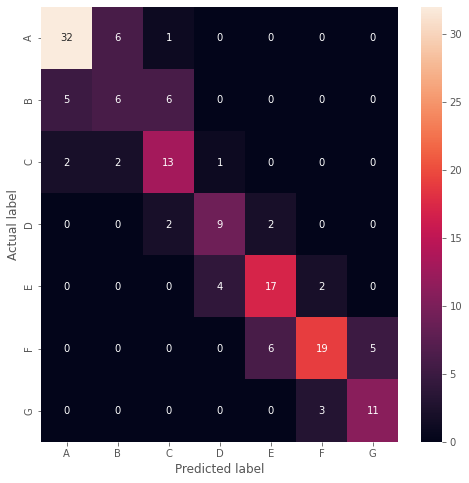

In [101]:
cm_model = pd.crosstab(predict_class(X_test_XG,xg_reg),y_test_b)
print(cm_model)
plt.figure(figsize=(8,8))
sns.heatmap(cm_model, annot=True, fmt="d");
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

Selon le f1-score et la matrice de confusion, on peut voir que le XGboost rencontre des difficultées a prédire la classe B


### Comparaison ###


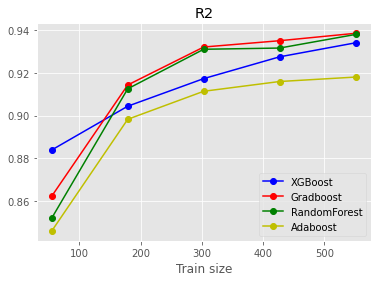

In [102]:
from sklearn.model_selection import learning_curve

#learning_curve(rfOpt, X=X_train, y=y_train_r)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(xg_reg, X_train_XG, y_train_r_XG, scoring="r2", cv=10)
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="b",label="XGBoost")
train_sizes, train_scores_svr, test_scores_svr = learning_curve(gradboostOpt, X_train, y_train_r, scoring="r2", cv=10)
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="r",label="Gradboost")
train_sizes, train_scores_svr, test_scores_svr = learning_curve(rfOpt, X_train, y_train_r, scoring="r2", cv=10)
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="g",label="RandomForest")
train_sizes, train_scores_svr, test_scores_svr = learning_curve(adaboost, X_train, y_train_r, scoring="r2", cv=10)
plt.plot(train_sizes, test_scores_svr.mean(1), 'o-', color="y",label="Adaboost")
plt.xlabel("Train size")
plt.ylabel("")
plt.title('R2')
plt.legend(loc="best")

plt.show()

En comparant le score des differents modeles en regression on remarque que le randomForest est le plus performant suivi du Gradient boosting et du XGboost. En revanche, si on les compare en terme de classification (en appliquant le seuillage) on constatera que les resultats change.

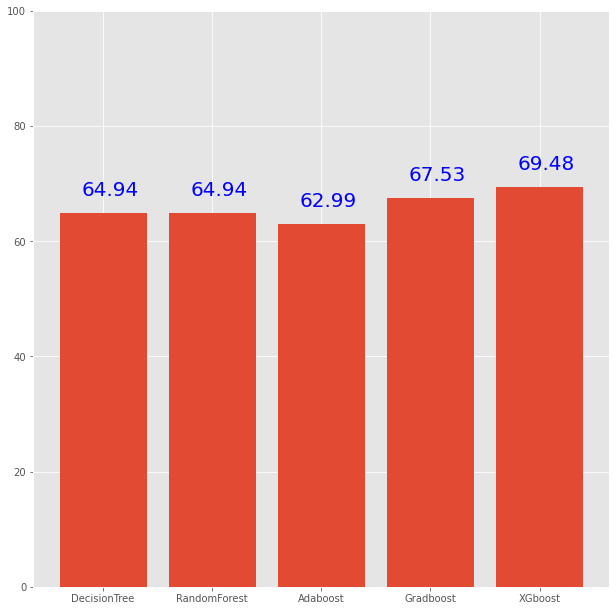

In [103]:
a = [score_OT,score_rf,score_adaboost, score_gradboostopt,score_xgb]
langs = ['DecisionTree','RandomForest', 'Adaboost', 'Gradboost','XGboost']
fig = plt.figure(figsize = (8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,a)
ax.set(ylim = (0,100))
for index,data in enumerate(a):
    plt.text(x=index-0.2 , y =data+3 , s=f"{round(data,2)}" , fontdict=dict(fontsize=20), color = 'b')
plt.show()

le XGboost est donc le plus performant en terme de classification

## Conclusion ##


En guise de conclusion, nous allons comparer les meilleurs modèles que nous avons obtenu tout au long de ce chapitre.

In [178]:
from sklearn.metrics import f1_score
d = {'Regression': [score_Ridge*1e-2, f1_score(y_test_b,predict_class(X_test,ridgeOpt), average='macro')],
     'Arbre de décision': [score_OT*1e-2, f1_score(y_test_b,predict_class(X_test,opt_tree), average='macro')],
     'Random forest': [score_rf*1e-2, f1_score(y_test_b,predict_class(X_test,rfOpt), average='macro')],
     'SVM': [score_svr*1e-2, f1_score(y_test_b,predict_class(X_test,grid_svropt), average='macro')],
     'Gradient boosting': [score_gradboostopt*1e-2, f1_score(y_test_b,predict_class(X_test,gradboostOpt), average='macro')],
    'Extrem Gradient boosting': [score_xgb*1e-2, f1_score(y_test_b,predict_class(X_test_XG,xg_reg), average='macro')]}

In [179]:
results = pd.DataFrame(data=d, index=['Accuracy', 'f1_score'])
results

Regression  Arbre de décision  Random forest       SVM  \
Accuracy     0.59090           0.649400       0.649400  0.551900   
f1_score     0.53361           0.611107       0.623823  0.501235   

          Gradient boosting  Extrem Gradient boosting  
Accuracy           0.675325                  0.694805  
f1_score           0.650628                  0.667092

In [188]:
results.to_csv('Results/Results_regression.csv', index=True)

Pour la regression les modeles ayant les meilleurs performances sont :
<ul>
    <li>XGboost</li>
    <li>Gradient boosting</li>
    <li>Random Forest </li>
    <li>Arbre de décision </li>
</ul>

<p> Nous avons testé différents modèles de régression et avons essayé de les optimiser via différent méthodes. Plusieurs similitudes surgissent lors des phases de test, notamment la difficulté à prédire la classe B. Ainsi que les erreurs de classification qui, nous avons remarqué se dispersent généralement en deux groupes : { A, B, C, D} et {E,F,G}. En effet, il est très rare qu'une classe soit prédite en une autre classe appartenant à un groupe diffèrent. Ces deux aspects sont montrés par l'ACP. </p>

In [180]:
import seaborn as sns
res = results.transpose()

## Conclusion generale ##

<p> Pour conclure notre projet nous avons choisi de faire une comparaison entre les scores obtenu de different modeles en regression et classification <p>

In [199]:
classific = pd.read_csv("Results_classification.csv")
classific.index = ['Accuracy','f1_score']
classific = classific.drop(['Unnamed: 0'], axis=1)
classific = classific.rename(columns={str(classific.columns[3]): 'SVM',str(classific.columns[0]): 'Regression'})
classificT = classific.transpose()
classificT

Accuracy  f1_score
Regression                0.571429  0.534840
Arbre de décision         0.642857  0.622932
Random forest             0.642857  0.605914
SVM                       0.741042  0.619821
Gradient boosting         0.616883  0.579653
Extrem Gradient boosting  0.616883  0.589966

In [200]:
res['type'] = 'Regression'
classificT['type'] = 'Classification'
merge = res.append(classificT)
merge

Accuracy  f1_score            type
Regression                0.590900  0.533610      Regression
Arbre de décision         0.649400  0.611107      Regression
Random forest             0.649400  0.623823      Regression
SVM                       0.551900  0.501235      Regression
Gradient boosting         0.675325  0.650628      Regression
Extrem Gradient boosting  0.694805  0.667092      Regression
Regression                0.571429  0.534840  Classification
Arbre de décision         0.642857  0.622932  Classification
Random forest             0.642857  0.605914  Classification
SVM                       0.741042  0.619821  Classification
Gradient boosting         0.616883  0.579653  Classification
Extrem Gradient boosting  0.616883  0.589966  Classification

In [196]:
import plotly.express as px

fig = px.histogram(merge, x=merge.index, y="Accuracy", color="type")
fig.update_layout(barmode='group')
fig.write_image("fig1.png")
fig = px.histogram(merge, x=merge.index, y="f1_score", color="type")
fig.update_layout(barmode='group')
fig.write_image("fig2.png")

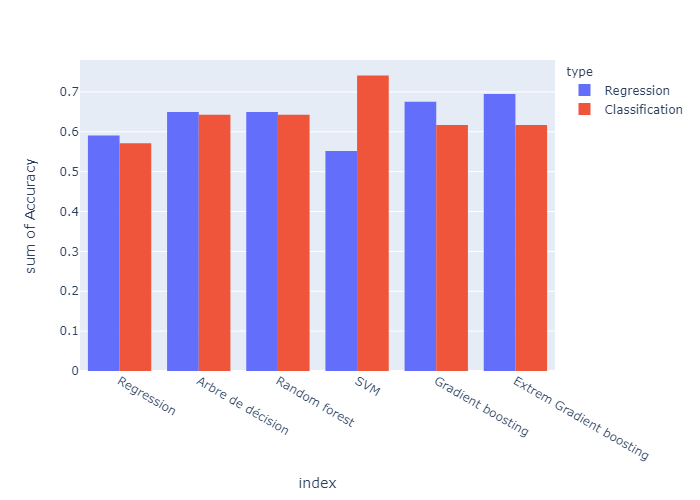

In [197]:
from IPython.display import Image
Image(filename='fig1.png') 

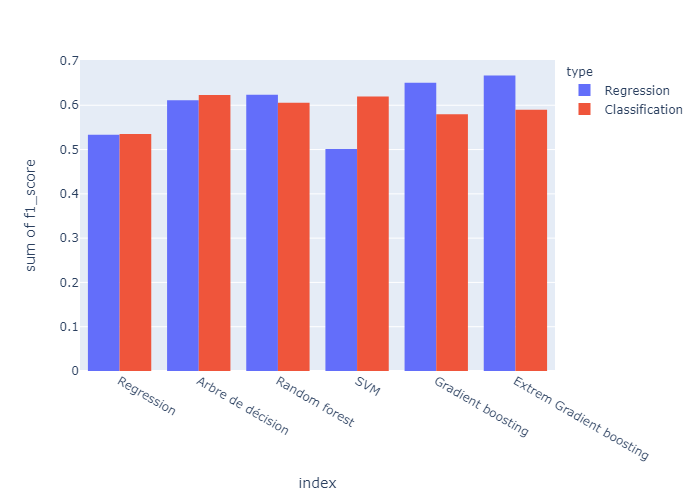

In [198]:
Image(filename='fig2.png')

<p> Les courbes ci-dessus montrent les performances de nos modèles dans les cas de régression et de classification. les métriques considérées sont l'accuracy et le f1_score. on constate que les régressions linéaire et logistique sont à peu pres équivalente en terme de f1_score. en ce qui est de l'arbre de décision et du random forest, on remarque une légère différence. pour les modèles de support vecteur machine et de boosting en revanche, on constate un écart considérable au niveau des performances. En effet, le SVM en classification (SVC) est nettement meilleur qu'en régression (SVR) et les méthodes de boosting (Gradient boosting et XGboost) montrent de meilleurs résultat côté régression. </p>
<p> Ainsi, après comparaison, on conclut que le modèle le plus prometteur pour prédire nos classes est le XGboost côté régression. on a choisi de prendre en compte le f1-score compte tenu du fait que nos classes sont déséquilibrées. </p>